## Flipr Hackathon 6.0



In [58]:
# !jupyter nbconvert --to html Data_Preprocessing_Final.ipynb

#### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import regex as re 
import locale
from locale import atof

### Data Preprocessing for Train Data

In [2]:
df = pd.read_csv(r"C:\Users\Aishwarya\PROJECTS\Flipr Hackathon\csv files\Train_dataset.csv", encoding="unicode_escape")
df.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,"1,24,42,373","1,19,78,450",878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115.0
1,Delhi,Delhi,M.C,"1,10,07,835","98,79,172",858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188.0
2,Bangalore,Karnataka,MPUA,"84,36,675","43,01,326",936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000.0
3,Hyderabad,Telangana,MPUA,"68,09,970","36,37,483",930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123.0
4,Ahmedabad,Gujarat,MPUA,"55,70,585","35,20,085",852.0,29.0,25.0,LOW,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204.0


In [57]:
null_rows = df[df.isnull().all(axis = 1)]
print(null_rows.shape)
null_rows.head(2)

(0, 12)


,city,city_type,median_age,avg_temp,swm,toilets_avl,water_purity,h_index,hospitals,foreign_visitors,Population Estimated for 2020 Till Aug,covid_cases


In [4]:
df.dropna(axis=0, how='all', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787 entries, 0 to 786
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               787 non-null    object 
 1   State              787 non-null    object 
 2   Type               787 non-null    object 
 3   Population [2011]  739 non-null    object 
 4   Popuation [2001]   295 non-null    object 
 5   Sex Ratio          777 non-null    float64
 6   Median Age         769 non-null    float64
 7   Avg Temp           770 non-null    float64
 8   SWM                783 non-null    object 
 9   Toilets Avl        761 non-null    float64
 10  Water Purity       629 non-null    float64
 11  H Index            647 non-null    float64
 12  Female Population  646 non-null    float64
 13  # of hospitals     772 non-null    float64
 14  Foreign Visitors   697 non-null    float64
 15  Covid Cases        787 non-null    float64
dtypes: float64(10), object(6)


**Correlation Matrix**

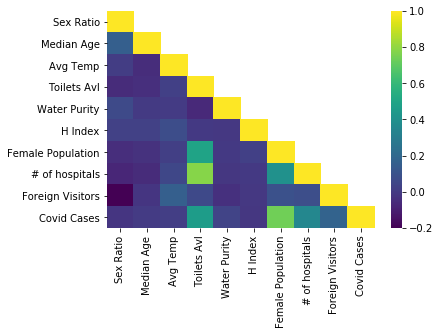

In [6]:
corr = df.corr()
np.tril(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(np.tril(np.ones(corr.shape)).astype(np.bool))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="viridis")

In [7]:
corr

,Sex Ratio,Median Age,Avg Temp,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
Sex Ratio,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Median Age,0.156686,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg Temp,0.012762,-0.046883,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Toilets Avl,-0.055500,-0.040233,0.028411,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
Water Purity,0.066704,0.001998,0.006183,-0.060858,1.000000,NaN,NaN,NaN,NaN,NaN
H Index,0.032622,0.030653,0.076450,-0.000428,-0.006362,1.000000,NaN,NaN,NaN,NaN
Female Population,-0.046222,-0.029244,0.020925,0.497193,-0.001173,0.028061,1.000000,NaN,NaN,NaN
# of hospitals,-0.070828,-0.054834,0.054354,0.782186,-0.009672,-0.003864,0.401056,1.000000,NaN,NaN
Foreign Visitors,-0.201233,-0.016207,0.158490,0.063314,-0.032464,-0.008397,0.094961,0.081615,1.00000,NaN
Covid Cases,-0.016067,0.008822,0.018650,0.459011,0.040631,-0.009073,0.738931,0.354827,0.17542,1.0


#### Insights from Correlation Matrix

| **First**  | **Second**  | **Value** | **Relation** |
| :------------------ | :------------- | ------- | :---------------------------|
| Sex Ratio  | Median Age  | 0.16 | Low Positive Correlation |
| Female Population  | Toilets Avl | 0.50 | Low Positive Correlation |
| \# of Hospitals | Toilets Avl | 0.78 | High Positive Correlation |
| \# of Hospitals | Female Population | 0.40 | Low Positive Correlation |
| Foreign Visitors | Sex Ratio | -0.20 | Low Negative Correlation |
| Foreign Visitors | Avg Temp | 0.16 | Low Positive Correlation |
| Covid Cases | Toilets Avl | 0.46 | Low Positive Correlation |
| Covid Cases | Female Population | 0.74 | High Positive Correlation |
| Covid Cases | # of hospitals | 0.35 | Low  Positive Correlation |
| Covid Cases | Foreign Visitors | 0.18 | Low  Positive Correlation |

**Toilets Availability Field**

In [8]:
toilets_mean = int(df['Toilets Avl'].mean())
df[df['Toilets Avl'].isnull()==True]
df['Toilets Avl'].fillna(toilets_mean,inplace=True)
df[df['Toilets Avl']==toilets_mean].head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
7,Kolkata,West Bengal,MPUA,"44,86,679","45,72,876",945.0,26.0,37.0,NaN,96.0,NaN,0.473585,4239912.0,82.0,1489500.0,44957.0
8,Surat,Gujarat,MPUA,"44,67,797","24,33,835",NaN,27.0,26.0,NaN,96.0,NaN,0.809334,3797627.0,98.0,284973.0,23432.0
9,Pune,Maharashtra,MPUA,"31,24,458","25,38,473",NaN,29.0,29.0,NaN,96.0,NaN,0.445902,2743274.0,50.0,4408916.0,218502.0
263,Panvel,Maharashtra,C-1T,"1,80,020","1,04,058",885.0,23.0,30.0,HIGH,96.0,NaN,0.397496,159318.0,55.0,4408916.0,8134.0
264,Shivpuri,Madhya Pradesh,C-1T,"1,79,977","1,46,892",934.0,26.0,32.0,LOW,96.0,NaN,0.811958,168099.0,74.0,421365.0,1450.0


**Median Age Field**

In [9]:
median_age_mean = int(df['Median Age'].mean())
df['Median Age'].fillna(median_age_mean,inplace=True)
df[df['Median Age']==median_age_mean].head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
5,Chennai,Tamil Nadu,MPUA,"46,81,087","43,43,645",904.0,26.0,31.0,HIGH,210.0,179.0,0.536995,4231703.0,67.0,4684707.0,145606.0
6,Chennai,Tamil nadu,T,"46,46,732",NaN,912.0,26.0,30.0,MEDIUM,145.0,177.0,0.093451,4237820.0,55.0,4684707.0,145606.0
7,Kolkata,West Bengal,MPUA,"44,86,679","45,72,876",945.0,26.0,37.0,NaN,96.0,NaN,0.473585,4239912.0,82.0,1489500.0,44957.0
10,Jaipur,Rajasthan,MPUA,"30,46,163","23,22,575",871.0,26.0,32.0,HIGH,128.0,172.0,0.889895,2653208.0,61.0,1475311.0,14001.0
13,Kanpur,Uttar Pradesh,MPUA,"27,65,348","25,51,337",861.0,26.0,29.0,HIGH,135.0,122.0,0.053147,2380965.0,94.0,3104060.0,22413.0


**H Index Field**

In [10]:
h_index_mean = df['H Index'].mean()
df['H Index'].fillna(h_index_mean,inplace=True)
df[df['H Index']==h_index_mean].head()


,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
28,Meerut,Uttar Pradesh,MPUA,"13,05,429","10,39,405",889.0,29.0,25.0,HIGH,100.0,NaN,0.497069,NaN,NaN,NaN,6092.0
29,Rajkot,Gujarat,MPUA,"12,86,678","9,67,476",848.0,23.0,28.0,HIGH,129.0,NaN,0.497069,NaN,NaN,NaN,6250.0
30,Kalyan-Dombivli,Maharashtra,MPUA,"12,47,327","11,93,512",871.0,23.0,38.0,LOW,144.0,NaN,0.497069,NaN,NaN,NaN,20018.0
31,Vasai-Virar,Maharashtra,MPUA,"12,22,390","6,93,350",876.0,23.0,33.0,HIGH,140.0,NaN,0.497069,NaN,NaN,NaN,20133.0
32,Varanasi,Uttar Pradesh,MPUA,"12,01,815","10,91,918",861.0,25.0,36.0,MEDIUM,121.0,NaN,0.497069,NaN,NaN,NaN,10287.0


**Water Purity Field**

In [11]:
water_mean = int(df['Water Purity'].mean())
df['Water Purity'].fillna(water_mean,inplace=True)
df[df['Water Purity']==water_mean].head()


,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,"1,24,42,373","1,19,78,450",878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115.0
7,Kolkata,West Bengal,MPUA,"44,86,679","45,72,876",945.0,26.0,37.0,NaN,96.0,150.0,0.473585,4239912.0,82.0,1489500.0,44957.0
8,Surat,Gujarat,MPUA,"44,67,797","24,33,835",NaN,27.0,26.0,NaN,96.0,150.0,0.809334,3797627.0,98.0,284973.0,23432.0
9,Pune,Maharashtra,MPUA,"31,24,458","25,38,473",NaN,29.0,29.0,NaN,96.0,150.0,0.445902,2743274.0,50.0,4408916.0,218502.0
28,Meerut,Uttar Pradesh,MPUA,"13,05,429","10,39,405",889.0,29.0,25.0,HIGH,100.0,150.0,0.497069,NaN,NaN,NaN,6092.0


**Average Temp**

In [12]:
temp_mean = int(df['Avg Temp'].mean())
df['Avg Temp'].fillna(temp_mean,inplace=True)
df[df['Avg Temp']==temp_mean].head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
1,Delhi,Delhi,M.C,"1,10,07,835","98,79,172",858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188.0
6,Chennai,Tamil nadu,T,"46,46,732",NaN,912.0,26.0,30.0,MEDIUM,145.0,177.0,0.093451,4237820.0,55.0,4684707.0,145606.0
45,Chandigarh,Chandigarh,MPUA,"10,28,667","8,08,515",818.0,25.0,30.0,LOW,147.0,126.0,0.055718,841450.0,56.0,29538.0,7292.0
52,Tiruchirappalli,Tamil Nadu,C-1T,NaN,"7,52,066",915.0,27.0,30.0,MEDIUM,141.0,155.0,0.601829,838757.0,51.0,4684707.0,8540.0
54,Aurangabad,Maharashtra,M.Cl,"8,92,483",NaN,877.0,28.0,30.0,MEDIUM,123.0,149.0,0.181617,782708.0,63.0,4408916.0,3201.0


**Hospitals field**

In [13]:
hosp_mean = int(df['# of hospitals'].mean())
df['# of hospitals'].fillna(hosp_mean,inplace=True)
df[df['# of hospitals']==hosp_mean].head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
28,Meerut,Uttar Pradesh,MPUA,"13,05,429","10,39,405",889.0,29.0,25.0,HIGH,100.0,150.0,0.497069,NaN,41.0,NaN,6092.0
29,Rajkot,Gujarat,MPUA,"12,86,678","9,67,476",848.0,23.0,28.0,HIGH,129.0,150.0,0.497069,NaN,41.0,NaN,6250.0
30,Kalyan-Dombivli,Maharashtra,MPUA,"12,47,327","11,93,512",871.0,23.0,38.0,LOW,144.0,150.0,0.497069,NaN,41.0,NaN,20018.0
31,Vasai-Virar,Maharashtra,MPUA,"12,22,390","6,93,350",876.0,23.0,33.0,HIGH,140.0,150.0,0.497069,NaN,41.0,NaN,20133.0
32,Varanasi,Uttar Pradesh,MPUA,"12,01,815","10,91,918",861.0,25.0,36.0,MEDIUM,121.0,150.0,0.497069,NaN,41.0,NaN,10287.0


**Foreign Visitors Field**

In [14]:
foreign_mean = int(df['Foreign Visitors'].mean())
df['Foreign Visitors'].fillna(foreign_mean,inplace=True)
df[df['Foreign Visitors']==foreign_mean].head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
28,Meerut,Uttar Pradesh,MPUA,"13,05,429","10,39,405",889.0,29.0,25.0,HIGH,100.0,150.0,0.497069,NaN,41.0,1457944.0,6092.0
29,Rajkot,Gujarat,MPUA,"12,86,678","9,67,476",848.0,23.0,28.0,HIGH,129.0,150.0,0.497069,NaN,41.0,1457944.0,6250.0
30,Kalyan-Dombivli,Maharashtra,MPUA,"12,47,327","11,93,512",871.0,23.0,38.0,LOW,144.0,150.0,0.497069,NaN,41.0,1457944.0,20018.0
31,Vasai-Virar,Maharashtra,MPUA,"12,22,390","6,93,350",876.0,23.0,33.0,HIGH,140.0,150.0,0.497069,NaN,41.0,1457944.0,20133.0
32,Varanasi,Uttar Pradesh,MPUA,"12,01,815","10,91,918",861.0,25.0,36.0,MEDIUM,121.0,150.0,0.497069,NaN,41.0,1457944.0,10287.0


**SWM Field**

In [15]:
df['SWM'].fillna("MEDIUM",inplace=True)
df[df['SWM']=="MEDIUM"].head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors,Covid Cases
0,Mumbai,Maharashtra,M.C,"1,24,42,373","1,19,78,450",878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115.0
1,Delhi,Delhi,M.C,"1,10,07,835","98,79,172",858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188.0
3,Hyderabad,Telangana,MPUA,"68,09,970","36,37,483",930.0,23.0,31.0,MEDIUM,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123.0
6,Chennai,Tamil nadu,T,"46,46,732",NaN,912.0,26.0,30.0,MEDIUM,145.0,177.0,0.093451,4237820.0,55.0,4684707.0,145606.0
7,Kolkata,West Bengal,MPUA,"44,86,679","45,72,876",945.0,26.0,37.0,MEDIUM,96.0,150.0,0.473585,4239912.0,82.0,1489500.0,44957.0


**Converting Population 2011, Population 2001 to float values**

In [16]:
def replace_comma(x):
    if str(x).lower()!="nan":
        return float(str(x).replace(",",""))
    else:
        return x
    
# removing all non characters except space
def clean_and_remove_punctuations(x):
    return re.sub(r"[^a-zA-Z0-9]+", '', x).lower()

In [17]:
df.columns = ["city", "state", "city_type", "population2011", "population2001", "sex_ratio", "median_age", "avg_temp", "swm", "toilets_avl", "water_purity", "h_index", "fem_population", "hospitals", "foreign_visitors", "covid_cases"]
df.head(3)

,city,state,city_type,population2011,population2001,sex_ratio,median_age,avg_temp,swm,toilets_avl,water_purity,h_index,fem_population,hospitals,foreign_visitors,covid_cases
0,Mumbai,Maharashtra,M.C,"1,24,42,373","1,19,78,450",878.0,23.0,32.0,MEDIUM,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115.0
1,Delhi,Delhi,M.C,"1,10,07,835","98,79,172",858.0,27.0,30.0,MEDIUM,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188.0
2,Bangalore,Karnataka,MPUA,"84,36,675","43,01,326",936.0,28.0,37.0,HIGH,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000.0


In [18]:
df['population2011'] = df['population2011'].apply(replace_comma)
df['population2001'] = df['population2001'].apply(replace_comma)
df['city_type'] = df['city_type'].apply(clean_and_remove_punctuations)
df['state'] = df['state'].apply(clean_and_remove_punctuations)
df['city'] = df['city'].apply(clean_and_remove_punctuations)

### Converting Categorical Values to numerical values

**Swm Field**

In [19]:
df['swm'].value_counts()

HIGH      272
LOW       260
MEDIUM    255
Name: swm, dtype: int64

In [20]:
swm_categories = {"HIGH":0 ,"MEDIUM":1 ,"LOW":2}
df['swm'] = df['swm'].map(swm_categories)
df.head()

,city,state,city_type,population2011,population2001,sex_ratio,median_age,avg_temp,swm,toilets_avl,water_purity,h_index,fem_population,hospitals,foreign_visitors,covid_cases
0,mumbai,maharashtra,mc,12442373.0,11978450.0,878.0,23.0,32.0,1,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115.0
1,delhi,delhi,mc,11007835.0,9879172.0,858.0,27.0,30.0,1,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188.0
2,bangalore,karnataka,mpua,8436675.0,4301326.0,936.0,28.0,37.0,0,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000.0
3,hyderabad,telangana,mpua,6809970.0,3637483.0,930.0,23.0,31.0,1,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123.0
4,ahmedabad,gujarat,mpua,5570585.0,3520085.0,852.0,29.0,25.0,2,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204.0


**City Type field**

In [21]:
df['city_type'].value_counts()

c1t              269
m                236
mcl               68
mpua              44
mb                32
ua                29
npp               20
np                16
tmc               16
ct                11
cmc               10
mc                 7
nac                6
tp                 6
cb                 3
npd                3
mcorp              3
t                  2
na                 2
tc                 2
nagarparishad      1
nt                 1
Name: city_type, dtype: int64

**Types of Cities by Population - Abbreviations**

* C.B: Cantonment Board / Cantonment 
* C.M.C: City Municipal Council 
* C.T: Census town 
* M: Municipality 	
* M.B: Municipal board 
* M.C: Municipal Committee 	
* M.Cl: Municipal Council 
* M.Corp: Municipal Corporation / Corporation 	
* N.A: Notified area 
* N.A.C: Notified area committee / Notified Area Council 	
* N.P: Nagar Panchayat 
* N.P.P: Nagar Palika Parishad 	
* N.Pd: Nagar Parishad 
* N.T: Notified Town  
* T.C: Town Committee / Town Area Committee 
* T.M.C: Town Municipal Council 
* T.P: Town Panchayat (T.P.) 	
* MPUA: Million Plus Urban Agglomeration 
* T: Town 
* UA: Urban agglomeration 
* C1T: Class 1 Towns 

In [23]:
df.loc[df['city_type'] == "nagarparishad", "city_type"] = 'npd'
type_categories = dict(zip(set(df['city_type']),list(range(len(set(df['city_type']))))))
df['city_type'] = df['city_type'].map(type_categories)

In [24]:
df.head()

,city,state,city_type,population2011,population2001,sex_ratio,median_age,avg_temp,swm,toilets_avl,water_purity,h_index,fem_population,hospitals,foreign_visitors,covid_cases
0,mumbai,maharashtra,2,12442373.0,11978450.0,878.0,23.0,32.0,1,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115.0
1,delhi,delhi,2,11007835.0,9879172.0,858.0,27.0,30.0,1,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188.0
2,bangalore,karnataka,8,8436675.0,4301326.0,936.0,28.0,37.0,0,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000.0
3,hyderabad,telangana,8,6809970.0,3637483.0,930.0,23.0,31.0,1,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123.0
4,ahmedabad,gujarat,8,5570585.0,3520085.0,852.0,29.0,25.0,2,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204.0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787 entries, 0 to 786
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   city              787 non-null    object 
 1   state             787 non-null    object 
 2   city_type         787 non-null    int64  
 3   population2011    739 non-null    float64
 4   population2001    295 non-null    float64
 5   sex_ratio         777 non-null    float64
 6   median_age        787 non-null    float64
 7   avg_temp          787 non-null    float64
 8   swm               787 non-null    int64  
 9   toilets_avl       787 non-null    float64
 10  water_purity      787 non-null    float64
 11  h_index           787 non-null    float64
 12  fem_population    646 non-null    float64
 13  hospitals         787 non-null    float64
 14  foreign_visitors  787 non-null    float64
 15  covid_cases       787 non-null    float64
dtypes: float64(12), int64(2), object(2)
memory u

In [27]:
## saving to csv
df.to_csv(r"C:\Users\Aishwarya\PROJECTS\Flipr Hackathon\processed.csv")

**Predicting the Population Growth Rate**

In [28]:
data = pd.read_csv(r"C:\Users\Aishwarya\Downloads\Datas.csv", encoding="unicode_escape")

In [29]:
df['Population Estimated for 2020 Till Aug'] = data['Population Estimated for 2020 Till Aug']

In [32]:
df.drop(["state","population2011", "population2001", "sex_ratio", "fem_population"], axis=1, inplace=True)

In [30]:
df.head()

,city,state,city_type,population2011,population2001,sex_ratio,median_age,avg_temp,swm,toilets_avl,water_purity,h_index,fem_population,hospitals,foreign_visitors,covid_cases,Population Estimated for 2020 Till Aug
0,mumbai,maharashtra,2,12442373.0,11978450.0,878.0,23.0,32.0,1,219.0,150.0,0.700440,10924403.0,159.0,4408916.0,163115.0,12860011
1,delhi,delhi,2,11007835.0,9879172.0,858.0,27.0,30.0,1,215.0,196.0,0.920018,9444722.0,148.0,2379169.0,80188.0,12097762
2,bangalore,karnataka,8,8436675.0,4301326.0,936.0,28.0,37.0,0,212.0,102.0,0.097085,7896728.0,123.0,636502.0,141000.0,15466316
3,hyderabad,telangana,8,6809970.0,3637483.0,930.0,23.0,31.0,1,217.0,118.0,0.827744,6333272.0,110.0,126078.0,55123.0,11957467
4,ahmedabad,gujarat,8,5570585.0,3520085.0,852.0,29.0,25.0,2,227.0,109.0,0.847941,4746138.0,73.0,284973.0,33204.0,8382870


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787 entries, 0 to 786
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   city                                    787 non-null    object 
 1   state                                   787 non-null    object 
 2   city_type                               787 non-null    int64  
 3   population2011                          739 non-null    float64
 4   population2001                          295 non-null    float64
 5   sex_ratio                               777 non-null    float64
 6   median_age                              787 non-null    float64
 7   avg_temp                                787 non-null    float64
 8   swm                                     787 non-null    int64  
 9   toilets_avl                             787 non-null    float64
 10  water_purity                            787 non-null    float6

**Correlation matrix after Data Preprocessing**

In [33]:
df.columns

Index(['city', 'city_type', 'median_age', 'avg_temp', 'swm', 'toilets_avl',
       'water_purity', 'h_index', 'hospitals', 'foreign_visitors',
       'covid_cases', 'Population Estimated for 2020 Till Aug'],
      dtype='object')

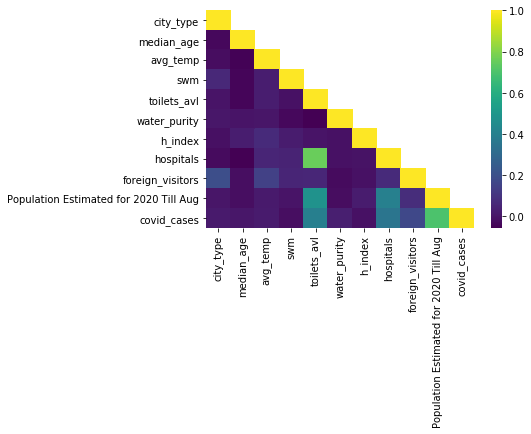

In [34]:
cols = ['city', 'city_type', 'median_age', 'avg_temp', 'swm', 'toilets_avl',
       'water_purity', 'h_index', 'hospitals', 'foreign_visitors',
       'Population Estimated for 2020 Till Aug', 'covid_cases']
df = df[cols]
corr = df.corr()
np.tril(np.ones(corr.shape)).astype(np.bool)
corr = corr.where(np.tril(np.ones(corr.shape)).astype(np.bool))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="viridis")

In [35]:
corr.loc["covid_cases"]

city_type                                 0.015891
median_age                                0.006583
avg_temp                                  0.018997
swm                                      -0.014794
toilets_avl                               0.394210
water_purity                              0.034585
h_index                                  -0.008977
hospitals                                 0.354248
foreign_visitors                          0.174722
Population Estimated for 2020 Till Aug    0.702819
covid_cases                               1.000000
Name: covid_cases, dtype: float64

**Insights - Correlation with `covid_cases` field**
* Population Estimated for 2020 Till Aug, toilets_avl, hospitals, foreign_visitors, water_purity have positive correlation
* swm, h_index have negative correlation 

**Saving the DataFrame as CSV**

In [36]:
df.to_csv(r"C:\Users\Aishwarya\PROJECTS\Flipr Hackathon\train_processed.csv")

### Data Preprocessing for Test Data

In [110]:
test_df = pd.read_csv(r"C:\Users\Aishwarya\PROJECTS\Flipr Hackathon\csv files\Test_dataset.csv", encoding="unicode_escape")
test_df.dropna(axis=0, how='all', inplace=True)
test_df.drop("Rate For 10 Years(%)", axis=1, inplace=True)

In [111]:
test_df.head()

,City,State,Type,Population [2011],Popuation [2001],Sex Ratio,Median Age,Avg Temp,SWM,Toilets Avl,Water Purity,H Index,Female Population,# of hospitals,Foreign Visitors
0,Tuensang,Nagaland,T.C,"36,774",NaN,931.0,23.0,10.0,MEDIUM,94.0,114.0,0.253390,34237.0,17.0,2769.0
1,Lakshmeshwar,Karnataka,T.M.C,"36,754",NaN,934.0,25.0,38.0,HIGH,62.0,160.0,0.192555,34328.0,13.0,636502.0
2,Zira,Punjab,M.Cl.,"36,732",NaN,883.0,29.0,35.0,HIGH,63.0,105.0,0.887882,32434.0,17.0,242367.0
3,Yawal,Maharashtra,M.Cl,"36,706",NaN,887.0,26.0,31.0,HIGH,60.0,174.0,0.407838,32558.0,11.0,4408916.0
4,Thana Bhawan,Uttar Pradesh,N.P.,"36,669",NaN,877.0,28.0,39.0,LOW,92.0,153.0,0.324456,32159.0,23.0,3104060.0


**Imputing null values in the test dataset**

In [112]:
toilets_mean = test_df['Toilets Avl'].mean()
test_df[test_df['Toilets Avl'].isnull()==True]
test_df['Toilets Avl'].fillna(toilets_mean,inplace=True)
median_age_mean = test_df['Median Age'].mean()
test_df['Median Age'].fillna(median_age_mean,inplace=True)
h_index_mean = test_df['H Index'].mean()
test_df['H Index'].fillna(h_index_mean,inplace=True)
water_mean = test_df['Water Purity'].mean()
test_df['Water Purity'].fillna(water_mean,inplace=True)
temp_mean = test_df['Avg Temp'].mean()
test_df['Avg Temp'].fillna(temp_mean,inplace=True)
test_df['SWM'].fillna("MEDIUM",inplace=True)
test_df['# of hospitals'].fillna(test_df['# of hospitals'].mean(),inplace=True)
test_df['Foreign Visitors'].fillna(test_df['Foreign Visitors'].mean(), inplace=True)

In [113]:
def replace_comma(x):
    if str(x).lower()!="nan":
        return float(str(x).replace(",",""))
    else:
        return x
    
# removing all non characters except space
def clean_and_remove_punctuations(x):
    if str(x).lower()!="nan":
        return re.sub("[^a-zA-Z0-9]+", '', str(x)).lower()
    return x

In [114]:
test_df.columns = ["city", "state", "city_type", "population2011", "population2001", "sex_ratio", "median_age", "avg_temp", "swm", "toilets_avl", "water_purity", "h_index", "fem_population", "hospitals", "foreign_visitors"]
test_df.head(3)

,city,state,city_type,population2011,population2001,sex_ratio,median_age,avg_temp,swm,toilets_avl,water_purity,h_index,fem_population,hospitals,foreign_visitors
0,Tuensang,Nagaland,T.C,"36,774",NaN,931.0,23.0,10.0,MEDIUM,94.0,114.0,0.253390,34237.0,17.0,2769.0
1,Lakshmeshwar,Karnataka,T.M.C,"36,754",NaN,934.0,25.0,38.0,HIGH,62.0,160.0,0.192555,34328.0,13.0,636502.0
2,Zira,Punjab,M.Cl.,"36,732",NaN,883.0,29.0,35.0,HIGH,63.0,105.0,0.887882,32434.0,17.0,242367.0


In [115]:
test_df["city_type"]

0        T.C
1      T.M.C
2      M.Cl.
3       M.Cl
4       N.P.
       ...  
496      N.P
497      N.P
498      N.P
499      N.P
500      C.T
Name: city_type, Length: 501, dtype: object

In [116]:
test_df['population2011'] = test_df['population2011'].apply(replace_comma)
test_df['population2001'] = test_df['population2001'].apply(replace_comma)
test_df['city_type'] = test_df['city_type'].apply(clean_and_remove_punctuations)
test_df['state'] = test_df['state'].apply(clean_and_remove_punctuations)
test_df['city'] = test_df['city'].apply(clean_and_remove_punctuations)

In [117]:
test_df.head()

,city,state,city_type,population2011,population2001,sex_ratio,median_age,avg_temp,swm,toilets_avl,water_purity,h_index,fem_population,hospitals,foreign_visitors
0,tuensang,nagaland,tc,36774.0,NaN,931.0,23.0,10.0,MEDIUM,94.0,114.0,0.253390,34237.0,17.0,2769.0
1,lakshmeshwar,karnataka,tmc,36754.0,NaN,934.0,25.0,38.0,HIGH,62.0,160.0,0.192555,34328.0,13.0,636502.0
2,zira,punjab,mcl,36732.0,NaN,883.0,29.0,35.0,HIGH,63.0,105.0,0.887882,32434.0,17.0,242367.0
3,yawal,maharashtra,mcl,36706.0,NaN,887.0,26.0,31.0,HIGH,60.0,174.0,0.407838,32558.0,11.0,4408916.0
4,thanabhawan,uttarpradesh,np,36669.0,NaN,877.0,28.0,39.0,LOW,92.0,153.0,0.324456,32159.0,23.0,3104060.0


In [118]:
test_df.tail()

,city,state,city_type,population2011,population2001,sex_ratio,median_age,avg_temp,swm,toilets_avl,water_purity,h_index,fem_population,hospitals,foreign_visitors
496,nandaprayag,uttarakhand,np,1641.0,NaN,848.0,27.0,7.0,MEDIUM,12.0,181.0,0.316926,1392.0,4.0,105882.0
497,kirtinagar,uttarakhand,np,1517.0,NaN,852.0,28.0,12.0,HIGH,16.0,198.0,0.336852,1292.0,6.0,105882.0
498,kedarnath,uttarakhand,np,612.0,NaN,853.0,24.0,9.0,LOW,19.0,189.0,0.723253,522.0,6.0,105882.0
499,gangotri,uttarakhand,np,110.0,NaN,852.0,27.0,8.0,MEDIUM,18.0,170.0,0.421061,94.0,8.0,105882.0
500,kumarganj,uttarpradesh,ct,NaN,NaN,863.0,24.0,35.0,HIGH,19.0,149.0,0.154375,0.0,6.0,3104060.0


**Converting Categorical Data**

In [119]:
def city_type_cat_to_num(x):
    if x in type_categories.keys():
        return type_categories[x]
    else:
        return 10
    
test_df['city_type'] = test_df['city_type'].apply(city_type_cat_to_num)
swm_categories = {"HIGH":0 ,"MEDIUM":1 ,"LOW":2}
test_df['swm'] = test_df['swm'].map(swm_categories)

In [120]:
test_df.head()

,city,state,city_type,population2011,population2001,sex_ratio,median_age,avg_temp,swm,toilets_avl,water_purity,h_index,fem_population,hospitals,foreign_visitors
0,tuensang,nagaland,6,36774.0,NaN,931.0,23.0,10.0,1,94.0,114.0,0.253390,34237.0,17.0,2769.0
1,lakshmeshwar,karnataka,14,36754.0,NaN,934.0,25.0,38.0,0,62.0,160.0,0.192555,34328.0,13.0,636502.0
2,zira,punjab,18,36732.0,NaN,883.0,29.0,35.0,0,63.0,105.0,0.887882,32434.0,17.0,242367.0
3,yawal,maharashtra,18,36706.0,NaN,887.0,26.0,31.0,0,60.0,174.0,0.407838,32558.0,11.0,4408916.0
4,thanabhawan,uttarpradesh,1,36669.0,NaN,877.0,28.0,39.0,2,92.0,153.0,0.324456,32159.0,23.0,3104060.0


In [121]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   city              501 non-null    object 
 1   state             501 non-null    object 
 2   city_type         501 non-null    int64  
 3   population2011    495 non-null    float64
 4   population2001    0 non-null      float64
 5   sex_ratio         496 non-null    float64
 6   median_age        501 non-null    float64
 7   avg_temp          501 non-null    float64
 8   swm               501 non-null    int64  
 9   toilets_avl       501 non-null    float64
 10  water_purity      501 non-null    float64
 11  h_index           501 non-null    float64
 12  fem_population    486 non-null    float64
 13  hospitals         501 non-null    float64
 14  foreign_visitors  501 non-null    float64
dtypes: float64(11), int64(2), object(2)
memory usage: 62.6+ KB


In [122]:
test_df.drop(["state","population2011", "population2001", "sex_ratio", "fem_population"], axis=1, inplace=True)

In [123]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   city              501 non-null    object 
 1   city_type         501 non-null    int64  
 2   median_age        501 non-null    float64
 3   avg_temp          501 non-null    float64
 4   swm               501 non-null    int64  
 5   toilets_avl       501 non-null    float64
 6   water_purity      501 non-null    float64
 7   h_index           501 non-null    float64
 8   hospitals         501 non-null    float64
 9   foreign_visitors  501 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 43.1+ KB


**Population Growth rate for test data**

In [124]:
data = pd.read_csv(r"C:\Users\Aishwarya\Downloads\TestDataFinal.csv", encoding="unicode_escape")
data.head()

,Unnamed: 0,city,city_type,median_age,avg_temp,swm,toilets_avl,water_purity,h_index,hospitals,foreign_visitors,population_till_aug
0,0,Tuensang,6,23.0,10.0,1.0,94.0,114.0,0.253390,17.0,2769.0,48234.315986
1,1,Lakshmeshwar,3,25.0,38.0,0.0,62.0,160.0,0.192555,13.0,636502.0,48187.482655
2,2,Zira,16,29.0,35.0,0.0,63.0,105.0,0.887882,17.0,242367.0,42789.621241
3,3,Yawal,16,26.0,31.0,0.0,60.0,174.0,0.407838,11.0,4408916.0,42759.333477
4,4,Thana Bhawan,15,28.0,39.0,2.0,92.0,153.0,0.324456,23.0,3104060.0,48089.854380


In [125]:
test_df['population_till_aug'] = data['population_till_aug']

**Saving the test data as csv**

In [126]:
test_df.to_csv(r"C:\Users\Aishwarya\PROJECTS\Flipr Hackathon\csv files\TestDataFinal.csv")

In [127]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 501 non-null    object 
 1   city_type            501 non-null    int64  
 2   median_age           501 non-null    float64
 3   avg_temp             501 non-null    float64
 4   swm                  501 non-null    int64  
 5   toilets_avl          501 non-null    float64
 6   water_purity         501 non-null    float64
 7   h_index              501 non-null    float64
 8   hospitals            501 non-null    float64
 9   foreign_visitors     501 non-null    float64
 10  population_till_aug  501 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 47.0+ KB
